In [39]:
import pandas as pd
import numpy as np

In [40]:
df=pd.read_csv("gender.csv")

test=pd.read_csv("test.csv")

In [41]:
df.head()

,Otu3,Otu6,Otu8,Otu22,Otu23,Otu40,Otu55,Otu61,Otu63,Otu70,...,Otu105,Otu108,Otu112,Otu122,Otu124,Otu145,Otu212,Otu217,Otu290,class
0,0.005587,0.966480,0.002793,0.000000,0.000000,0.002793,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022346,0.000000,0.000000,M
1,0.000000,0.759850,0.136961,0.037523,0.001876,0.000000,0.005629,0.000000,0.000000,0.000000,...,0.001876,0.000000,0.000938,0.003752,0.000000,0.015009,0.015947,0.001876,0.000000,F
2,0.007411,0.033351,0.002118,0.000000,0.890418,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066702,0.000000,0.000000,F
3,0.000000,0.016625,0.035376,0.000387,0.001160,0.209356,0.080997,0.020878,0.202590,0.067659,...,0.045042,0.011405,0.007153,0.040209,0.209743,0.014692,0.001160,0.001160,0.000000,F
4,0.000442,0.004419,0.136544,0.029607,0.065400,0.077331,0.160848,0.000000,0.022095,0.000000,...,0.011489,0.000442,0.053469,0.120194,0.000000,0.176315,0.019885,0.000000,0.116217,M


In [42]:
#Label encoding of categorical variables
from sklearn import preprocessing
le=label_encoder = preprocessing.LabelEncoder()
df["class"]=le.fit_transform(df["class"])

In [43]:
df["class"]

0      1
1      0
2      0
3      0
4      1
      ..
940    1
941    1
942    1
943    0
944    0
Name: class, Length: 945, dtype: int32

In [44]:
#checking for null values
df.isnull().sum()
df=df.dropna()

In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression


In [46]:
target=df["class"]
features=df.drop("class", axis=1)
features.head()

,Otu3,Otu6,Otu8,Otu22,Otu23,Otu40,Otu55,Otu61,Otu63,Otu70,Otu92,Otu105,Otu108,Otu112,Otu122,Otu124,Otu145,Otu212,Otu217,Otu290
0,0.005587,0.966480,0.002793,0.000000,0.000000,0.002793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022346,0.000000,0.000000
1,0.000000,0.759850,0.136961,0.037523,0.001876,0.000000,0.005629,0.000000,0.000000,0.000000,0.018762,0.001876,0.000000,0.000938,0.003752,0.000000,0.015009,0.015947,0.001876,0.000000
2,0.007411,0.033351,0.002118,0.000000,0.890418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066702,0.000000,0.000000
3,0.000000,0.016625,0.035376,0.000387,0.001160,0.209356,0.080997,0.020878,0.202590,0.067659,0.034409,0.045042,0.011405,0.007153,0.040209,0.209743,0.014692,0.001160,0.001160,0.000000
4,0.000442,0.004419,0.136544,0.029607,0.065400,0.077331,0.160848,0.000000,0.022095,0.000000,0.005303,0.011489,0.000442,0.053469,0.120194,0.000000,0.176315,0.019885,0.000000,0.116217


Roc AUC score: 0.7184544917257683


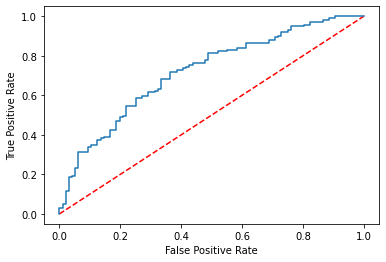

In [47]:
#Getting Roc auc score using Gradient Boosting Classifier
def GBModel(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)
    GB = GradientBoostingClassifier().fit(X_train, y_train)  
    
    #define metrics
    y_pred_proba = GB.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    #for plotting the red line:
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='red')

    

    print("Roc AUC score:",auc)
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

GBModel(features,target)

In [48]:
#Applying Random Forest Classifier:
def RFModel(X,y):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    y_predict=rf.predict(X_test)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print("Accuracy score:",accuracy_score(y_test, y_predict))
    
    
RFModel(features,target)

[[42 37]
 [25 85]]
              precision    recall  f1-score   support

           0       0.63      0.53      0.58        79
           1       0.70      0.77      0.73       110

    accuracy                           0.67       189
   macro avg       0.66      0.65      0.65       189
weighted avg       0.67      0.67      0.67       189

Accuracy score: 0.671957671957672


Roc AUC score: 0.7183067375886525


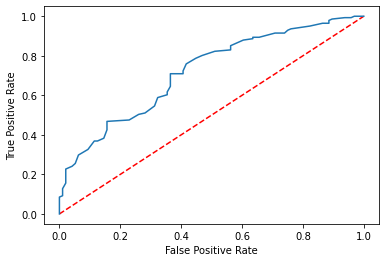

In [49]:
#Getting Roc auc score using Random Forest Classifier:

def RFModel(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    y_pred_proba = rf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("Roc AUC score:",auc)
    
    #for plotting the red line:
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
    
    
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
RFModel(features,target)

Roc AUC score: 0.6964391252955082


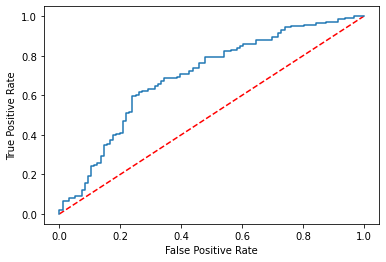

In [50]:
#Getting Roc auc score using Logistic Regression Classifier:

def LRModel(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)
    LR = LogisticRegression().fit(X_train, y_train)  
    
    #define metrics
    y_pred_proba = LR.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("Roc AUC score:",auc)
    
    #for plotting the red line:
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
    
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

LRModel(features,target)

Roc AUC score: 0.6117760047281324


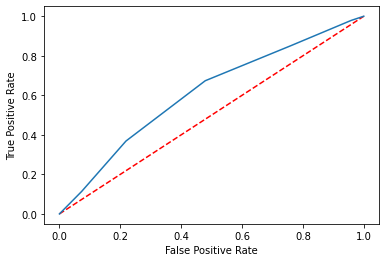

In [51]:

#Getting Roc auc score using K_nearest Neighbor Classifier:
def KNNModel(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
   
    y_pred_proba = knn.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #for plotting the red line:
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
  
    
    print("Roc AUC score:",auc)
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
KNNModel(features,target)

NOTE: The cells shown below were added only to test whether the model will accurately predict the target value or not.

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test["class"]=le.fit_transform(test["class"])
tt=test["class"]
test=test.drop("class", axis =1)
tt.head()

0    1
1    1
2    1
3    0
4    0
Name: class, dtype: int32

In [31]:
#Testing the Random Forest classifier Model using new data:
def RFModel(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    y_predict=rf.predict(test)
    print(confusion_matrix(tt,y_predict))
    print(classification_report(tt,y_predict))
    print("Accuracy score:",accuracy_score(tt, y_predict))
RFModel(features,target)

[[ 67   7]
 [  2 113]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        74
           1       0.94      0.98      0.96       115

    accuracy                           0.95       189
   macro avg       0.96      0.94      0.95       189
weighted avg       0.95      0.95      0.95       189

Accuracy score: 0.9523809523809523
